# Preliminaries

In this chapter we apply the forward difference formula to solve a general class of ordinary differential equation called an *initial value problem*. After completing the chapter you should be able to:
* Recognise the general form an initial value problem, which may be written as a single ODE or as a first order system.
* Be able to implement the explicit Euler method to numerically obtain an approximate numeric solution.

## First order problem

We consider a general class of problem, which has the following form:

```{math}
:label: ivp1
\frac{\mathrm{d}x}{\mathrm{d}t}=f(t,x), \quad x(t_0)=x_0.
```

This is known as an initial value problem (IVP), because the solution for $x$ is determined from the derivative rule together with a given initial value. The special case where the function $f$ does not explicitly contain the independent variable $t$ is called the *autonomous* case.

### Example

The logistic function that we plotted in {numref}`chapex1` is defined by the following IVP:

```{math}
:label: ord1logist
\frac{\mathrm{d}x}{\mathrm{d}t}=r x \left(1-\frac{x}{c}\right), \qquad x(0)=x_0.
```

```{exercise}
Is this IVP autonomous?
```

```{toggle}
Yes, this is an example of an autonomous IVP because it does not contain the independent variable $t$.
```

### Explicit Euler method

To obtain a numeric estimate of the solution to the first order IVP we can use the finite difference formula

```{math}
:label: fdiff-basic
\frac{\Delta x}{\Delta t}  =\frac{x_{k+1}-x_k}{h} +\mathcal{O}(h),
```

where $h$ is the step size of $t$. By using this formula to replace the continuous derivative in {eq}`ivp1` we obtain the following rearrangement, which defines the explicit Euler method:

\begin{equation}
x_{k+1} = x_k + h f(t_k,x_k) + \mathcal{O}(h^2).
\end{equation}

This iterative formula allows us to sequentially obtain the solution values at a given set of grid-points $[t_1,t_2,\dots,t_n]$. 

```{exercise}
Write out the first couple of iterations of the formula, to understand how it works.
```

```{toggle}
We obtain
\begin{align*}
x_1 &= x_0+h f(t_0,x_0)\\
x_2 &= x_1+h f(t_1,x_1)\\
\dots
\end{align*}
```

The explicit Euler method can be interpreted graphically: We start from the given initial point $(t_0,x_0)$ and "step forward" along the tangent line defined by $f(t_0,x_0)$ to obtain the next point $(t_1,x_1)$. The method is re-applied at each point until the end of the integration domain is reached, as illustrated below. The approximation would be better for smaller step size!

<br>

```{image} ../images/forward1.png
:alt: forward stepping
:scale: 100%
:align: center
```

An illustration of how the method can be applied on the computer is shown below. We first define the independent variable grid $t$ and pre-allocate space for the dependent variable grid $x$. The first element in the solution grid is populated with the initial condition. Then we march forward using a loop-based technique to fill out the remaining values in the grid one-by-one.

```{image} ../images/first_order1.png
:alt: forward stepping
:align: center
```

<br>

The following code provides an example of how the method can be implemented.  Notice that in the iterative formula we have used `x1` to represent $x_k$ and `x2` to represent $x_{k+1}$ with the understanding that `x1` is updated with each iteration. The implementation uses `**kwargs` to pack and unpack a dictionary of keyword arguments (see {numref}`guru-ivp`):

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def eulerf(f,x0,tRange,h=1e-3,**kwargs):
  tmin,tmax=tRange
  stop=tmax+2*h    
  t = np.arange(tmin,stop,h)  #stop value is not included

  n=len(t);                   #get number of values
  x=np.empty(n); x[0]=x0      #form output array

  for k in range(n-1):
    t1,x1=t[k],x[k]           #labels introduced for convenience
    x2=x1+h*f(t1,x1,**kwargs) #explicit Euler forward step 
    x[k+1]=x2
  
  return t,x

<br>

We can use the function that we have defined to solve the IVP for the logistic curve. The demonstration below uses the parameters $r=1.5$ and $C=75$ that were selected in {numref}`chapex1`, with the initial value taken as $x(0)=C/2$.

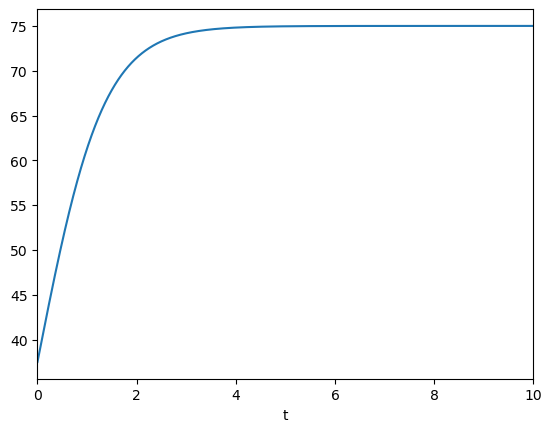

In [3]:
def dxdt(t,x,r,C):
  return r*x*(1-x/C)

tRange=[0,10]; x0=75/2
t,x=eulerf(dxdt,x0,tRange,r=1.5,C=75)

plt.plot(t,x)
plt.xlim(tRange)
plt.xlabel('t')
plt.show()

```{warning}
Even though the ODE in this example was autonomous, the way that we defined `eulerf` required that the first two arguments of `dxdt` are `t` and `x`, in that order.
```

(guru-ivp)=
### For Python gurus

A **tuple** is basically the same as a list, except that it is immutable. Tuples are denoted with round brackets, whilst lists are denoted by square brackets. We can easily convert between the two types:

In [4]:
a_list  = ['hello',1.,'world']
a_tuple = ('hello',1.,'world')

print(tuple(a_list))
print(list(a_tuple))

('hello', 1.0, 'world')
['hello', 1.0, 'world']


A **dictionary** is used to store data in key:value pairs. Dictionaries are denoted by curly brackets (braces). Values from a dictionary can be retrieved by using their key. For example,

In [5]:
student_id = {'SJMET79': 'Metcalfe', 'PBRAT20': 'Bratby', 'SAMOZ15': 'Mozaffari'}
student_id['SJMET79']

'Metcalfe'

**Unpacking** a list assigns the values to variables, as demonstrated by the following example. Notice that the number of variables in the assignment must match the number of items in the list:

In [6]:
r,g,b=['red','green','blue']

The **asterisk** operator \* can be used to unpack lists and tuples when they are passed as inputs to a function. The example below demonstrates unpacking the list `[1,2,3]` into the function `myadd` :

In [7]:
def myadd(a,b,c):
  print(a+b+c)

vals = [1,2,3]
myadd(*vals)

6


The asterisk can also be used to *pack* values into a tuple, as demonstrated here:

In [8]:
def mypack(*args):
  print(args)

mypack(1,2,3,4,5)

(1, 2, 3, 4, 5)


Packing can be extremely useful for functions as it allows us to have a variable number of inputs. In the following example, we iterate over the elements of the tuple `args` to sum the inputs:

In [9]:
def mysum(*args):
  s=0
  for arg in args:
    s+=arg
  return s

print(mysum(1,2,3,4,5))

15


A **double asterisk** \*\* performs unpacking and packing for dictionaries. This allows us to pass an arbitrary number of keyword arguments to a function:

In [10]:
def module_info(**kwargs):
  for key in kwargs:
    print("%s = %s" % (key, kwargs[key]))

module_info(code='NSCI0011',name='Topics in Scientific Computing',year='2022')

code = NSCI0011
name = Topics in Scientific Computing
year = 2022


It is possible to specify standard arguments together with extra keyword or non-keyword arguments, as demonstrated in the example below.

In [11]:
def myplot(f,xRange,n=1000,**kwargs):
  min,max = xRange
  x=np.linspace(min,max,n)
  y=f(x,**kwargs)
  fig = plt.figure()
  plt.plot(x,y); plt.xlim(xRange)
  return fig

```{exercise}
In the `myplot` function, identify:
* The mandatory argument(s) that can be specified using their position or keyword
* The optional argument(s) that can be specified using their position or keyword
* The optional argument(s) that must be specified using keywords
```

```{toggle}
* The mandatory positional/keyword arguments are `f,xRange` 
* The optional positional/keyword argument is `n`
* Any additional keyword arguments are collected by `**kwargs`
```

To illustrate the use of `myplot`, we plot the logistic curve on the range $[0,10]$ by passing the keyword arguments $r=1.5,C=75$ :

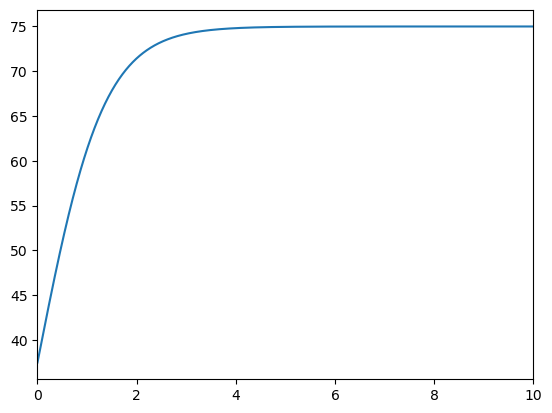

In [12]:
# Define logistic function
def myf(x,r,C,x0=0):
  return C/(1+np.exp(-r*(x-x0)))

# Plot for given parameters
myplot(myf,[0,10],r=1.5,C=75)
plt.show()

````{exercise}
Which of the following expressions generates an error, and why?

```{code}
myplot(xRange=[0,10],f=myf,r=1.5,C=75)
myplot([0,10],r=1.5,C=75,f=myf)
myplot(xRange=[0,10],r=1.5,C=75,n=100,f=myf)
```

````

## First order system

We can extend the explicit Euler method to solve an initial value problem involving a first order system of the following form:

\begin{equation}
\frac{\mathrm{d}\underline{x}}{\mathrm{d}t}=\underline{F}(t,\underline{x}), \qquad \underline{x}(t_0)=\underline{x}_0.
\end{equation}


### Example 

The classic Lotka-Volterra predator prey model is given by the following pair of coupled ODEs, in which $x$ represents the prey population and $y$ represents the predator population. The parameters $a,b,p,q$ are assumed to be constant:

\begin{align}
\dot{x} &= a x - p xy, \qquad  & x(0)=x_0,\\
\dot{y} &= -b y + q xy, \qquad & y(0)=y_0.
\end{align}

Here, $\underline{x}=(x,y)$, $\underline{x}_0=(x_0,y_0)$ and $\underline{F}(t,\underline{x}) = (ax-pxy,-by+qxy)$.

### Explicit Euler method 

Application of the explicit Euler method to solve the array problem is straightforward. The state of the dependent variable at each gridpoint fully determines the state at the next step, as defined by the function $\underline{F}(t_k,\underline{x}_k)$. We just need to store the state of all dependent variables in the solution grid, as illustrated below for the case of two dependent variables:


```{image} ../images/first_order2.png
:alt: forward stepping
:align: center
```

Only a minor modification of the previously defined `eulerf` is required. The modified code below can be used to solve an IVP involving an arbitrary number of dependent variables:

In [13]:
def eulerf(F,X0,tRange,h=1e-3,**kwargs):
  tmin,tmax=tRange
  stop=tmax+2*h    
  t = np.arange(tmin,stop,h)    #stop value is not included

  X0 = np.array([X0]).flatten() #make x0 a 1D array
  n=len(t); m=len(X0)           #get number of values
  X=np.empty([n,m]); X[0]=X0    #form output array

  for k in range(n-1):
    t1,X1=t[k],X[k]             #labels introduced for convenience
    X2=X1+h*F(t1,X1,**kwargs)   #Euler forward difference 
    X[k+1]=X2
  
  return t,X

<br>

The definition for $\underline{F}(t,\underline{x})$ must return a numpy array as output. The code below provides an example of how this may be implemented for the Lotka-Volterra system with chosen paramters:

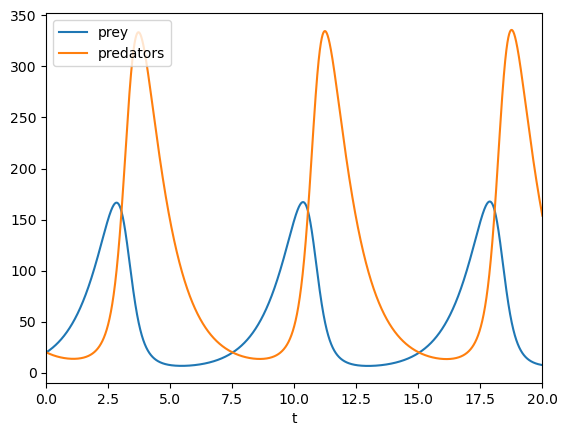

In [14]:
def dXdt(t,X,a,b,p,q):
  x,y = X
  dxdt= a*x - p*x*y 
  dydt=-b*y + q*x*y
  return np.array([dxdt,dydt])

X0=[20,20]; tRange=[0,20]     # initial conditions
params = {"a": 1., "b": 1., "p": .01, "q": .02}

t,X=eulerf(dXdt,X0,tRange,**params)
plt.plot(t,X[:,0],label='prey')
plt.plot(t,X[:,1],label='predators')
plt.xlim(tRange); plt.xlabel('t')
plt.legend()
plt.show()

## Chapter exercise 


**Question 1**<br>
Apply the explicit Euler method to numerically solve the following non-autonomous IVP and plot your solution $x(t)$ :

\begin{equation*}
\frac{\mathrm{d}x}{\mathrm{d}t}+x = e^{-(t-2)}, \qquad x(0)=1.
\end{equation*}

**Question 2**<br>
Apply the explicit Euler method to numerically solve the following coupled ODE system for the case when $p=28$, $s=10$, $b=2.667$ and use the code given below to make a parameteric plot of your solution

\begin{align}
\dot{x} & = s(y-x)\\
\dot{y} & = x(p-z)-y\\
\dot{z} & = xy-bz
\end{align}

```{code}
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y, z)
```

**Question 3**<br>
Rewrite the following initial value problem as a first order system and use the explicit Euler method to obtain its numeric solution:

```{math}
:label: ode2or
\ddot{x}+2\dot{x}+10x=0, \qquad x(0)=1, \quad \dot{x}(0)=-1.
```